In [1]:
import torch
print(torch.__version__)

2.5.1+cu121


In [5]:
"hello"

'hello'

In [7]:
from torch import nn
import matplotlib.pyplot as plt

In [11]:
## Data preparing and loading

In [15]:
weight = 0.7
bias = 0.3 

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [17]:
len(X), len(y)

(50, 50)

In [19]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:] , y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [23]:
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

In [35]:
import matplotlib.pyplot as plt

def p(train_data, train_labels, test_data, test_labels, predictions=None):
    """
    Plots training data, test data, and optionally predictions.
    """
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    plt.legend(prop={"size":12})
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Train/Test/Predictions Visualization")
    plt.grid(True)
    plt.show()


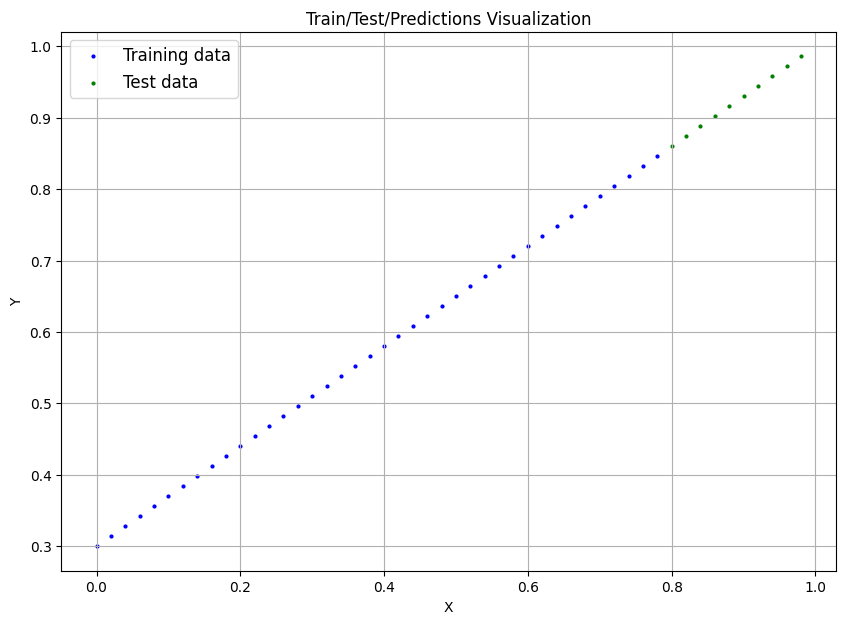

In [43]:
p(X_train, y_train, X_test, y_test);

In [45]:
## Building first pytorch model

In [47]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, reqires_grad=True, dtype=torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bais